In [1]:
import staintools
import csv
import os
import glob
import re
from pandas import DataFrame, Series
from PIL import Image
import timeit
import time
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_paths = ["../data_segments/data_balanced_duplicate_sample/train/EE/"]

In [3]:
# get images
images = {}
images_by_folder = {}
for train_path in train_paths:
    images_by_folder[str(train_path)] = []
    files = glob.glob(os.path.join(train_path, '*.jpg'))
    for fl in files:
        flbase = os.path.basename(fl)
        flbase_noext = os.path.splitext(flbase)[0]
        images[flbase_noext]=fl
        images_by_folder[str(train_path)].append(flbase_noext)

In [4]:
# initialize stain and brightness normalizer
stain_normalizer = staintools.StainNormalizer(method='vahadane')
standardizer = staintools.BrightnessStandardizer()

In [5]:
# choose target image
target_image = staintools.read_image("../data_segments/data_balanced_duplicate_sample/valid/Celiac/C06-27_01_1000_2000_0.jpg")
standard_target_image = standardizer.transform(target_image)
stain_normalizer.fit(standard_target_image)

In [6]:
# get destination path
path_change_map = {}

for key in list(images_by_folder.keys()):
    temp = key.replace('..', '/scratch/as3ek')
    path_change_map[key] = temp

1 73_4750_1750_0
2 59_7470_2490_0
3 79_5000_7000_0
4 120_12616_2822_0
5 130377_6729_001_4980_3154_0
6 111_4482_6640_0
7 58_3486_664_0
8 87_5661_4329_0
9 120_3800_9200_0
10 130379_6731_002_3330_2220_0
11 130372_6724_001_5644_4316_0
12 108_9130_5976_0
13 130379_6731_001_1200_5900_0
14 130369_6721_001_5300_14800_0
15 130376_6728_001_5254_852_0
16 130378_6730_001_2200_6600_0
17 22_4814_3818_0
18 130378_6730_001_666_1887_0
19 130373_6725_001_2300_3800_0
20 130377_6729_001_2800_4200_0
21 22_4250_5750_0
22 11_5000_2250_0
23 50_498_7636_0
24 50_999_5328_0
25 130380_6726_001_3774_777_0
26 59_2750_1500_0
27 23_7000_5200_0
28 130369_6721_001_8800_12200_0
29 77_3600_1200_0
30 42_3750_1000_0
31 23_3996_11655_0
32 130378_6730_002_2664_6105_0
33 50_4750_6250_0
34 130380_6726_001_2250_1000_0
35 130373_6725_002_0_4700_0
36 130365_6716_001_2500_3700_0
37 84_2400_1400_0
38 87_3154_6142_0
39 130369_6721_001_800_3700_0
40 111_332_5810_0
41 73_2997_5661_0
42 35_2000_5400_0
43 130370_6722_001_1500_10800_0
44

/home/as3ek/.local/lib/python3.6/site-packages/staintools/utils/misc_utils.py:56: RuntimeWarning: invalid value encountered in true_divide
  return A / np.linalg.norm(A, axis=1)[:, None]
/home/as3ek/.local/lib/python3.6/site-packages/staintools/stain_normalizer.py:42: RuntimeWarning: divide by zero encountered in true_divide
  source_concentrations *= (self.maxC_target / maxC_source)
/home/as3ek/.local/lib/python3.6/site-packages/staintools/stain_normalizer.py:42: RuntimeWarning: invalid value encountered in multiply
  source_concentrations *= (self.maxC_target / maxC_source)


226 120_6400_4200_0
227 77_5600_5400_0
228 130378_6730_001_625_2000_0
229 130377_6729_001_4884_1776_0
230 58_2988_1660_0
231 130373_6725_001_3154_2656_0
232 130370_6722_001_6106_12922_0
233 73_6972_1660_0
234 130369_6721_001_900_3900_0
235 51_3320_1992_0
236 130369_6721_001_5106_14874_0
237 51_2400_1200_0
238 77_6250_8500_0
239 130376_6728_001_2000_125_0
240 23_4600_2000_0
241 77_6250_9250_0
242 108_10292_7470_0
243 130380_6726_001_3000_1250_0
244 35_4400_6600_0
245 59_7659_2331_0
246 59_6200_3400_0
247 87_4750_3500_0
248 130379_6731_002_2553_4662_0
249 130378_6730_001_625_7625_0
250 50_200_6600_0
251 35_7250_1750_0
252 130373_6725_002_3125_3375_0
253 130378_6730_001_2300_5100_0
254 59_8000_1750_0
255 85_4814_7968_0
256 130379_6731_002_2997_4329_0
257 130372_6724_001_3266_9940_0
258 42_4150_664_0
259 130377_6729_001_4700_3500_0
260 130379_6731_002_1562_5112_0
261 130378_6730_002_1776_4551_0
262 130372_6724_001_2556_5822_0
263 130376_6728_001_4662_222_0
264 58_6474_2490_0
265 130372_672

539 130378_6730_002_1562_3976_0
540 84_4000_1800_0
541 84_2600_3400_0
542 130378_6730_002_1250_1750_0
543 59_3984_3818_0
544 130376_6728_001_4402_994_0
545 85_4329_7326_0
546 130379_6731_001_1400_2900_0
547 130370_6722_001_125_11625_0
548 130379_6731_001_4402_3692_0
549 77_3818_4980_0
550 130373_6725_001_498_3320_0
551 120_5994_4662_0
552 130373_6725_002_3996_2109_0
553 77_0_2750_0
554 29_4814_2490_0
555 130379_6731_002_4662_3219_0
556 130379_6731_001_2553_2997_0
557 130373_6725_001_4118_2272_0
558 73_4662_6993_0
559 130369_6721_001_900_2800_0
560 73_2400_4800_0
561 120_1328_5810_0
562 50_3154_8466_0
563 23_5000_5000_0
564 23_5478_1328_0
565 51_1000_2800_0
566 130379_6731_002_3000_5200_0
567 79_3200_7600_0
568 130369_6721_001_9213_10656_0
569 130378_6730_001_1125_7000_0
661 22_4150_4814_0
662 42_3154_2158_0
663 130376_6728_001_100_1000_0
664 130372_6724_001_2324_6142_0
665 87_3400_4600_0
666 130373_6725_001_4773_1443_0
667 130369_6721_001_8900_12100_0
668 111_2200_7600_0
669 130370_672

945 73_4316_6806_0
946 130378_6730_002_666_2664_0
947 111_2822_7968_0
948 130376_6728_001_1221_888_0
949 35_4980_2158_0
950 130373_6725_001_444_4662_0
951 130372_6724_001_3700_9300_0
952 130370_6722_001_1554_10878_0
953 58_5000_1600_0
954 73_3154_5644_0
955 130370_6722_001_3750_13750_0
956 42_5478_3154_0
957 130373_6725_001_4440_333_0
958 130369_6721_001_8625_10125_0
959 130372_6724_001_1826_9960_0
960 130373_6725_002_3000_2300_0
961 130378_6730_002_2158_6806_0
962 23_15438_4482_0
963 130370_6722_001_6390_12496_0
964 130378_6730_002_0_498_0
965 130379_6731_002_5700_1200_0
966 11_1200_3400_0
967 130378_6730_002_1125_2500_0
968 130369_6721_001_9879_11100_0
969 130369_6721_001_5772_15984_0
970 130373_6725_002_3154_2324_0
971 35_3663_1665_0
972 85_2997_7992_0
973 130379_6731_002_2822_5810_0
974 23_4750_8500_0
975 73_5810_3984_0
976 130370_6722_001_9375_2000_0
977 130378_6730_001_2220_4329_0
978 130378_6730_002_1200_400_0
979 73_4250_8250_0
980 23_9600_7600_0
981 130369_6721_001_8804_9088_0

1246 130373_6725_002_2875_1375_0
1247 50_6600_3600_0
1248 130379_6731_002_3400_4800_0
1249 130379_6731_002_5254_1278_0
1250 130369_6721_001_9230_10650_0
1251 130378_6730_001_1750_7625_0
1252 85_6308_6806_0
1253 85_2600_6800_0
1254 130370_6722_001_13375_3875_0
1255 130377_6729_001_2556_3976_0
1256 130378_6730_002_1660_6142_0
1257 130370_6722_001_700_10300_0
1258 130376_6728_001_6308_166_0
1259 130379_6731_002_1665_2997_0
1260 130376_6728_001_5700_900_0
1261 77_6972_7470_0
1262 130372_6724_001_2698_6106_0
1263 130369_6721_001_1162_18758_0
1264 73_3486_9462_0
1265 130369_6721_001_2000_16375_0
1266 130380_6726_001_4440_1443_0
1267 130369_6721_001_2997_1998_0
1268 108_4600_4200_0
1269 130378_6730_002_2300_6600_0
1270 51_4316_996_0
1271 120_8466_5146_0
1272 51_4662_666_0
1273 130379_6731_002_6105_1554_0
1274 130373_6725_001_4316_664_0
1275 58_7000_4500_0
1276 50_2600_1200_0
1277 73_5400_5200_0
1278 120_2000_7800_0
1279 130378_6730_001_2158_3818_0
1280 87_4648_5146_0
1281 85_3000_5750_0
1282 

1551 29_4814_2158_0
1552 87_3200_1400_0
1553 51_2997_3330_0
1554 79_3800_2400_0
1555 130379_6731_001_2982_1562_0
1556 130373_6725_002_4482_498_0
1557 130376_6728_001_3800_1300_0
1558 130377_6729_001_5217_1776_0
1559 130379_6731_002_5800_1900_0
1560 130380_6726_001_2982_1278_0
1561 130382_6718_001_2250_125_0
1562 130365_6716_001_1704_852_0
1563 130379_6731_002_5750_2000_0
1564 11_5328_5994_0
1565 130373_6725_001_3500_900_0
1566 130379_6731_002_6771_1221_0
1567 130379_6731_001_2000_4000_0
1568 130379_6731_001_830_5644_0
1569 130372_6724_001_3885_888_0
1570 130370_6722_001_3108_12987_0
1571 84_3250_2000_0
1572 77_664_1328_0
1573 35_7659_2331_0
1574 130379_6731_001_3250_1375_0
1575 130380_6726_001_2822_1162_0
1576 130370_6722_001_11502_3976_0
1577 130377_6729_001_2988_3818_0
1578 130379_6731_002_5772_2442_0
1579 58_6800_3000_0
1580 42_4750_4000_0
1581 130378_6730_001_2125_7750_0
1582 85_1750_3750_0
1583 130379_6731_001_3652_3818_0
1584 130372_6724_001_2200_5800_0
1585 130379_6731_002_5328_

1843 22_2000_6750_0
1844 84_5750_2500_0
1845 130379_6731_001_1826_5976_0
1846 130373_6725_002_3320_2490_0
1847 130378_6730_002_1665_2442_0
1848 108_5250_2500_0
1849 130373_6725_002_1443_3663_0
1850 42_2822_6142_0
1851 59_4250_3750_0
1852 11_3000_5000_0
1853 130369_6721_001_710_17608_0
1854 22_3400_2200_0
1855 130380_6726_001_3774_1443_0
1856 130382_6718_001_1750_4000_0
1857 130365_6716_001_3154_5146_0
1858 77_3500_750_0
1859 85_3652_6806_0
1860 50_5478_3320_0
1861 130373_6725_001_3108_1110_0
1862 51_3154_2490_0
1863 79_4000_4200_0
1864 73_3000_8800_0
1865 79_3800_4000_0
1866 130369_6721_001_9879_11322_0
1867 130376_6728_001_2300_1600_0
1868 11_2200_2000_0
1869 77_498_3320_0
1870 130370_6722_001_13250_4375_0
1871 23_2490_6972_0
1872 130372_6724_001_4100_400_0
1873 85_4814_6474_0
1874 130378_6730_001_1278_3834_0
1875 120_4800_5400_0
1876 120_6500_8250_0
1877 130378_6730_002_1200_1300_0
1878 130370_6722_001_2500_13000_0
1879 79_7250_5000_0
1880 130370_6722_001_9900_2700_0
1881 73_7138_747

2153 130372_6724_001_3100_5600_0
2154 73_7000_7500_0
2155 79_4800_7400_0
2156 130382_6718_001_1750_2250_0
2157 130372_6724_001_5964_3976_0
2158 120_9296_5644_0
2159 130370_6722_001_1665_11322_0
2160 130369_6721_001_5538_11076_0
2161 130372_6724_001_3500_9750_0
2162 130373_6725_001_4662_666_0
2163 35_4814_2490_0
2164 130369_6721_001_7881_13542_0
2165 130378_6730_001_555_7326_0
2166 42_5312_4980_0
2167 85_5146_1328_0
2168 85_7636_2822_0
2169 130379_6731_001_444_7215_0
2170 23_15200_2600_0
2171 23_10956_7304_0
2172 85_2490_5146_0
2173 130377_6729_001_6100_1300_0
2174 130373_6725_001_4544_1562_0
2175 87_2664_1665_0
2176 130370_6722_001_5217_11988_0
2177 130370_6722_001_9125_3125_0
2178 130379_6731_001_1750_3375_0
2179 130373_6725_002_111_4218_0
2180 23_6800_8600_0
2181 23_1992_9628_0
2182 130365_6716_001_2158_4150_0
2183 130382_6718_001_1000_2800_0
2184 50_3154_2490_0
2185 130376_6728_001_5500_750_0
2186 120_9000_4000_0
2187 130370_6722_001_332_11454_0
2188 108_5500_7500_0
2189 130372_6724

2458 130379_6731_001_710_6816_0
2459 130382_6718_001_1300_4500_0
2460 130370_6722_001_600_10600_0
2461 120_2822_4980_0
2462 35_2656_3320_0
2463 11_2800_4600_0
2464 59_5644_830_0
2465 130369_6721_001_8991_11766_0
2466 130372_6724_001_4000_8500_0
2467 130370_6722_001_6000_12375_0
2468 130373_6725_001_284_3408_0
2469 58_7000_4800_0
2470 23_5400_2800_0
2471 130379_6731_001_1100_6200_0
2472 35_4482_4980_0
2473 42_5000_4750_0
2474 130369_6721_001_4260_284_0
2475 58_3400_1200_0
2476 130379_6731_001_2000_5125_0
2477 130373_6725_001_4200_800_0
2478 77_2988_1494_0
2479 22_4316_3154_0
2480 108_7636_9462_0
2481 77_6200_8000_0
2482 130369_6721_001_5254_11644_0
2483 79_5400_3200_0
2484 50_2250_8250_0
2485 130378_6730_001_800_6300_0
2486 130379_6731_002_4600_2800_0
2487 130370_6722_001_6106_13064_0
2488 130378_6730_002_1443_6438_0
2489 120_9990_4995_0
2490 85_1998_5994_0
2491 130372_6724_001_5661_3441_0
2492 111_4329_8325_0
2493 73_2400_8000_0
2494 59_2600_1000_0
2495 130379_6731_002_5125_3125_0
2496

2757 130372_6724_001_3900_200_0
2758 59_7250_3750_0
2759 130379_6731_001_4686_3692_0
2760 120_5810_8134_0
2761 130369_6721_001_1562_2556_0
2762 130369_6721_001_3800_15100_0
2763 85_5146_2656_0
2764 120_8000_2500_0
2765 51_1328_1660_0
2766 23_10126_7636_0
2767 108_9324_5661_0
2768 130380_6726_001_4260_1420_0
2769 130372_6724_001_2553_4440_0
2770 130369_6721_001_5312_12616_0
2771 85_4316_2656_0
2772 85_7138_1660_0
2773 130369_6721_001_4440_15207_0
2774 130369_6721_001_3154_15272_0
2775 130369_6721_001_4440_12321_0
2776 130379_6731_002_6216_888_0
2777 130378_6730_001_2000_2125_0
2778 130373_6725_001_666_3330_0
2779 130372_6724_001_3441_3441_0
2780 130379_6731_001_5500_1900_0
2781 130377_6729_001_2750_4625_0
2782 84_1162_4482_0
2783 130379_6731_001_142_6816_0
2784 130379_6731_002_3996_3663_0
2785 73_5600_1000_0
2786 130382_6718_001_900_3500_0
2787 11_3400_2600_0
2788 58_1992_1826_0
2789 130370_6722_001_1562_10082_0
2790 130372_6724_001_3400_6200_0
2791 130379_6731_001_1000_6500_0
2792 1303

3055 11_6142_3320_0
3056 130370_6722_001_10400_3600_0
3057 130378_6730_001_333_2442_0
3058 130369_6721_001_8946_10934_0
3059 130379_6731_001_3300_3300_0
3060 50_3984_6972_0
3061 130378_6730_001_999_5661_0
3062 130379_6731_002_2500_2375_0
3063 23_5478_1992_0
3064 130379_6731_002_2656_5146_0
3065 79_3400_5400_0
3066 130370_6722_001_12125_2375_0
3067 130372_6724_001_6106_3692_0
3068 130378_6730_001_800_2100_0
3069 130382_6718_001_2109_2664_0
3070 73_3652_8466_0
3071 130369_6721_001_2100_3000_0
3072 130382_6718_001_2400_300_0
3073 22_830_2988_0
3074 120_2800_8400_0
3075 130379_6731_001_4551_3330_0
3076 35_3200_1200_0
3077 85_6142_3486_0
3078 130382_6718_001_1846_1136_0
3079 130370_6722_001_12099_1998_0
3080 130373_6725_002_300_4100_0
3081 58_5600_3800_0
3082 50_5400_3000_0
3083 23_14774_2656_0
3084 130373_6725_002_1887_3552_0
3085 130369_6721_001_8100_14400_0
3086 108_1500_5750_0
3087 130379_6731_002_1400_5600_0
3088 130370_6722_001_5500_13600_0
3089 130369_6721_001_2698_15478_0
3090 13037

3364 22_3320_7304_0
3365 130373_6725_002_2300_3600_0
3366 130369_6721_001_11125_9750_0
3367 23_11600_6400_0
3368 87_4400_4000_0
3369 130369_6721_001_7400_14500_0
3370 130382_6718_001_568_3550_0
3371 130379_6731_002_3125_2375_0
3372 130382_6718_001_1110_3885_0
3373 130373_6725_001_4600_1600_0
3374 29_4648_1494_0
3375 23_9250_8250_0
3376 73_6600_3800_0
3377 79_5644_6640_0
3378 130382_6718_001_1562_3692_0
3379 130372_6724_001_2500_5200_0
3380 130373_6725_002_4600_600_0
3381 79_5800_6000_0
3382 23_9296_8964_0
3383 87_2324_6640_0
3384 130379_6731_001_1000_6250_0
3385 108_9657_8325_0
3386 130377_6729_001_0_5822_0
3387 130378_6730_002_999_2442_0
3388 130369_6721_001_2900_1800_0
3389 130370_6722_001_12765_3108_0
3390 108_5661_8991_0
3391 130365_6716_001_2125_4375_0
3392 130379_6731_001_500_6375_0
3393 130369_6721_001_6000_14600_0
3394 73_3000_6600_0
3395 130372_6724_001_3400_2900_0
3396 130365_6716_001_2324_4316_0
3397 130369_6721_001_8700_11100_0
3398 130379_6731_002_3154_3486_0
3399 22_2800_

3667 120_7138_4482_0
3668 79_7800_5200_0
3669 120_6500_5000_0
3670 85_7250_6500_0
3671 130381_6723_001_999_0_0
3672 85_7138_1494_0
3673 87_1826_4482_0
3674 130373_6725_002_3000_3700_0
3675 130365_6716_001_1875_3375_0
3676 130373_6725_001_2400_1600_0
3677 130369_6721_001_4800_0_0
3678 130378_6730_002_1000_2900_0
3679 130373_6725_001_3400_1100_0
3680 85_8325_4329_0
3681 11_3250_1500_0
3682 50_400_6000_0
3683 130369_6721_001_9990_11322_0
3684 85_4316_996_0
3685 58_6500_3500_0
3686 130373_6725_002_500_4000_0
3687 130370_6722_001_9960_3320_0
3688 35_5600_600_0
3689 130382_6718_001_2400_3100_0
3690 85_1750_5250_0
3691 108_2800_3000_0
3692 130376_6728_001_200_500_0
3693 23_5644_9296_0
3694 23_333_7659_0
3695 77_5810_3486_0
3696 42_4150_3486_0
3697 130372_6724_001_3250_2250_0
3698 111_1400_8800_0
3699 130370_6722_001_1221_10545_0
3700 77_1992_6308_0
3701 77_600_3000_0
3702 111_664_1660_0
3703 130369_6721_001_830_3154_0
3704 23_6640_4814_0
3705 130376_6728_001_1554_1554_0
3706 50_5328_4995_0
37

3972 130379_6731_001_1375_5250_0
3973 130379_6731_002_2300_5500_0
3974 130379_6731_001_3408_4686_0
3975 130378_6730_001_852_994_0
3976 23_5400_4000_0
3977 29_3000_1250_0
3978 35_3800_4000_0
3979 23_8798_3652_0
3980 58_4316_2988_0
3981 130379_6731_002_3000_2200_0
3982 130372_6724_001_5478_4482_0
3983 23_11988_4662_0
3984 130379_6731_001_6400_2200_0
3985 59_7968_2158_0
3986 130372_6724_001_2698_4402_0
3987 130379_6731_002_444_6327_0
3988 120_5478_7802_0
3989 130377_6729_001_3250_3625_0
3990 130370_6722_001_7500_11500_0
3991 130373_6725_001_1900_2900_0
3992 130377_6729_001_4700_2100_0
3993 22_2000_3200_0
3994 130369_6721_001_10750_10250_0
3995 130372_6724_001_3663_9546_0
3996 29_500_1750_0
3997 50_2490_2988_0
3998 130365_6716_001_2997_4884_0
3999 77_3000_5750_0
4000 130378_6730_002_1000_4400_0
4001 23_4000_8800_0
4002 130370_6722_001_7138_11786_0
4003 130373_6725_001_900_4300_0
4004 130373_6725_001_3000_3800_0
4005 130370_6722_001_710_11786_0
4006 130373_6725_002_3330_3219_0
4007 130379_6

4278 130365_6716_001_2109_4107_0
4279 130377_6729_001_4551_1998_0
4280 130379_6731_002_6300_1600_0
4281 23_1665_9990_0
4282 130377_6729_001_4000_3600_0
4283 35_7326_3663_0
4284 130379_6731_001_1554_4551_0
4285 111_2200_3800_0
4286 130370_6722_001_11600_3700_0
4287 84_5500_2250_0
4288 111_2490_5976_0
4289 130370_6722_001_2109_12099_0
4290 50_5800_1600_0
4291 130379_6731_002_2700_3600_0
4292 130376_6728_001_500_1200_0
4293 77_5644_1162_0
4294 111_999_7326_0
4295 23_4662_3663_0
4296 130376_6728_001_3200_1500_0
4297 73_6806_3320_0
4298 23_6250_10250_0
4299 50_5976_5644_0
4300 51_3154_1162_0
4301 120_3486_8466_0
4302 130376_6728_001_3100_500_0
4303 87_2490_2490_0
4304 130370_6722_001_4884_12987_0
4305 130369_6721_001_10878_8991_0
4306 120_5976_6474_0
4307 130373_6725_002_1500_4250_0
4308 130370_6722_001_8300_12300_0
4309 130377_6729_001_4400_3200_0
4310 108_4316_5146_0
4311 130372_6724_001_2158_4980_0
4312 130369_6721_001_6882_10323_0
4313 130378_6730_001_1162_3652_0
4314 130378_6730_001_17

4587 130378_6730_001_400_1700_0
4588 11_4000_2000_0
4589 23_5976_4316_0
4590 111_4400_1800_0
4591 130373_6725_001_3800_600_0
4592 51_3663_2997_0
4593 130377_6729_001_5822_1420_0
4594 108_5976_4316_0
4595 130369_6721_001_7548_9324_0
4596 58_2000_600_0
4597 42_4995_4995_0
4598 130379_6731_002_4551_2442_0
4599 50_1826_6474_0
4600 130377_6729_001_1400_5400_0
4601 130376_6728_001_875_125_0
4602 130370_6722_001_3500_13600_0
4603 85_4662_7659_0
4604 22_2822_1660_0
4605 130379_6731_001_3125_4375_0
4606 59_7470_332_0
4607 130369_6721_001_7875_14125_0
4608 130378_6730_001_1400_4900_0
4609 130373_6725_002_222_3219_0
4610 130379_6731_001_5680_1846_0
4611 130373_6725_002_0_4686_0
4612 130379_6731_001_3834_1846_0
4613 77_2000_3400_0
4614 79_5800_6400_0
4615 77_4150_3652_0
4616 120_1200_7200_0
4617 130372_6724_001_3800_300_0
4618 77_2656_4150_0
4619 130365_6716_001_2625_3125_0
4620 130369_6721_001_10656_10323_0
4621 42_5146_3486_0
4622 130370_6722_001_5112_12780_0
4623 130370_6722_001_999_11544_0
462

4899 130372_6724_001_4000_1000_0
4900 35_5328_1332_0
4901 108_5200_4600_0
4902 58_7750_2750_0
4903 59_4400_3800_0
4904 51_4200_3000_0
4905 11_2822_5478_0
4906 79_3320_5644_0
4907 130370_6722_001_6771_11544_0
4908 130377_6729_001_1110_5772_0
4909 130369_6721_001_5300_16200_0
4910 130370_6722_001_12600_3200_0
4911 23_5200_10600_0
4912 11_1800_2600_0
4913 130370_6722_001_10545_2331_0
4914 108_6806_6142_0
4915 50_4600_4000_0
4916 108_166_4814_0
4917 130379_6731_001_3900_3900_0
4918 120_4000_6250_0
4919 130373_6725_001_3330_1887_0
4920 130377_6729_001_5750_1000_0
4921 84_2000_2250_0
4922 73_3000_3800_0
4923 120_12400_3200_0
4924 23_5200_800_0
4925 108_2500_6250_0
4926 130372_6724_001_900_11200_0
4927 23_5976_8300_0
4928 79_400_2600_0
4929 59_7250_750_0
4930 130373_6725_002_4329_1776_0
4931 130372_6724_001_800_9600_0
4932 130378_6730_002_1500_5300_0
4933 120_9600_4800_0
4934 130373_6725_002_4773_1665_0
4935 130379_6731_002_3550_4970_0
4936 130370_6722_001_1704_11076_0
4937 130373_6725_002_20

5213 130379_6731_001_5538_1420_0
5214 50_4648_3984_0
5215 50_332_8134_0
5216 130379_6731_002_3400_5100_0
5217 130377_6729_001_1250_5000_0
5218 130370_6722_001_7900_13200_0
5219 29_2158_3320_0
5220 130382_6718_001_1846_2982_0
5221 84_1800_5600_0
5222 87_1800_1000_0
5223 130373_6725_001_125_4125_0
5224 130377_6729_001_4118_2840_0
5225 73_4316_1494_0
5226 85_4400_1000_0
5227 130379_6731_002_4440_2997_0
5228 130380_6726_001_3320_332_0
5229 130370_6722_001_11400_3700_0
5230 11_5200_5000_0
5231 58_5250_3000_0
5232 130365_6716_001_2997_4995_0
5233 29_3750_4500_0
5234 130365_6716_001_3976_5254_0
5235 22_3818_4150_0
5236 87_332_5976_0
5237 51_1328_2324_0
5238 59_7000_2200_0
5239 50_3000_5200_0
5240 130370_6722_001_9100_13400_0
5241 35_5312_5644_0
5242 130379_6731_002_5100_3300_0
5243 77_830_5312_0
5244 130370_6722_001_2500_13500_0
5245 108_5400_4200_0
5246 130379_6731_002_568_5964_0
5247 50_3320_4980_0
5248 50_4814_3320_0
5249 130373_6725_001_4107_1221_0
5250 42_6142_2490_0
5251 87_4995_5328_0


5528 130378_6730_002_2324_4814_0
5529 130378_6730_001_1887_3552_0
5530 77_2600_5200_0
5531 130370_6722_001_13400_3800_0
5532 85_5000_400_0
5533 120_3000_5000_0
5534 58_7138_5810_0
5535 130373_6725_001_1250_3375_0
5536 130382_6718_001_1776_2553_0
5537 130373_6725_001_1221_3330_0
5538 51_3000_3200_0
5539 84_3320_3984_0
5540 130377_6729_001_111_6660_0
5541 35_3750_3000_0
5542 130369_6721_001_5625_11625_0
5543 130365_6716_001_2400_1600_0
5544 130376_6728_001_300_200_0
5545 35_3652_2158_0
5546 130379_6731_002_2100_5700_0
5547 84_3652_1494_0
5548 120_7250_6750_0
5549 120_10323_2997_0
5550 59_5994_3996_0
5551 130372_6724_001_4544_9372_0
5552 130373_6725_001_2200_4100_0
5553 130373_6725_002_2800_2500_0
5554 23_15272_4980_0
5555 130373_6725_001_2625_1250_0
5556 130370_6722_001_3330_12432_0
5557 130379_6731_001_1846_5822_0
5558 130378_6730_002_1000_4125_0
5559 130379_6731_002_1826_2490_0
5560 35_7750_2750_0
5561 130378_6730_001_664_0_0
5562 130369_6721_001_1846_2272_0
5563 130370_6722_001_2200_1

5822 23_6327_4995_0
5823 130378_6730_001_2414_4828_0
5824 59_7200_800_0
5825 130370_6722_001_6200_13200_0
5826 120_4648_4980_0
5827 130382_6718_001_1700_700_0
5828 108_5976_3320_0
5829 130369_6721_001_4662_444_0
5830 130365_6716_001_2000_3250_0
5831 130373_6725_002_2700_1300_0
5832 130373_6725_002_3000_2000_0
5833 130380_6726_001_4970_1420_0
5834 22_3750_7500_0
5835 130380_6726_001_2875_1750_0
5836 130370_6722_001_12750_3750_0
5837 130378_6730_002_1110_7770_0
5838 130372_6724_001_2556_3124_0
5839 130378_6730_002_1375_7250_0
5840 87_2400_3000_0
5841 120_12500_1500_0
5842 130378_6730_001_1700_1900_0
5843 87_1494_7304_0
5844 77_2997_3996_0
5845 22_1400_1800_0
5846 130372_6724_001_2664_5994_0
5847 111_6660_5328_0
5848 130379_6731_002_4250_4000_0
5849 130379_6731_002_4773_2997_0
5850 130379_6731_002_4980_2158_0
5851 23_1200_10000_0
5852 130379_6731_002_4875_3000_0
5853 23_16200_3000_0
5854 130369_6721_001_8880_9324_0
5855 59_7138_1660_0
5856 42_3600_4200_0
5857 130369_6721_001_1328_3320_0
5

6124 130365_6716_001_2490_4814_0
6125 130370_6722_001_600_10100_0
6126 130372_6724_001_3500_3875_0
6127 130373_6725_002_3996_1554_0
6128 130369_6721_001_7000_13900_0
6129 130370_6722_001_11454_2490_0
6130 87_3000_5800_0
6131 59_2988_3652_0
6132 130373_6725_001_2400_3100_0
6133 130369_6721_001_4600_12800_0
6134 73_6308_7802_0
6135 77_1400_6000_0
6136 130369_6721_001_7326_9435_0
6137 130378_6730_002_1100_3800_0
6138 108_4482_5478_0
6139 130370_6722_001_12125_3500_0
6140 85_8466_4316_0
6141 73_3663_8991_0
6142 85_1665_3996_0
6143 58_4600_4200_0
6144 79_4800_7800_0
6145 130370_6722_001_11900_3900_0
6146 77_3600_7200_0
6147 111_2000_4600_0
6148 130377_6729_001_4260_2272_0
6149 11_2988_6142_0
6150 84_2997_4662_0
6151 130381_6723_001_852_284_0
6152 50_2158_4980_0
6153 130370_6722_001_11375_2875_0
6154 42_5644_4648_0
6155 130370_6722_001_2500_12750_0
6156 130370_6722_001_12750_3875_0
6157 130369_6721_001_3625_875_0
6158 130373_6725_001_1400_4400_0
6159 130378_6730_002_800_4900_0
6160 130376_67

6431 79_2997_7659_0
6432 130370_6722_001_10300_2000_0
6433 87_3750_1750_0
6434 130376_6728_001_3108_555_0
6435 130382_6718_001_1500_1700_0
6436 130369_6721_001_12200_10000_0
6437 111_2490_3984_0
6438 130370_6722_001_2600_11900_0
6439 23_15250_750_0
6440 59_4648_3320_0
6441 130372_6724_001_3441_2220_0
6442 130370_6722_001_4125_13250_0
6443 23_11122_8964_0
6444 130379_6731_001_1875_4875_0
6445 42_1826_5644_0
6446 87_2500_2500_0
6447 59_8325_1665_0
6448 130378_6730_001_1221_7437_0
6449 130378_6730_002_1250_6125_0
6450 130365_6716_001_1900_4500_0
6451 22_4200_7600_0
6452 22_2750_4000_0
6453 130378_6730_001_666_2442_0
6454 130369_6721_001_7770_9324_0
6455 130372_6724_001_4375_8125_0
6456 79_5328_3330_0
6457 85_2400_3000_0
6458 23_13500_5250_0
6459 77_1200_6200_0
6460 85_4648_8466_0
6461 130379_6731_002_555_6105_0
6462 130369_6721_001_4100_13900_0
6463 130372_6724_001_1826_9794_0
6464 79_5800_7800_0
6465 111_4482_1660_0
6466 23_1400_10200_0
6467 130372_6724_001_3000_3600_0
6468 108_4662_4995

6732 35_1400_5400_0
6733 130365_6716_001_1700_3200_0
6734 130377_6729_001_3500_4250_0
6735 130369_6721_001_7636_13280_0
6736 130370_6722_001_11211_2664_0
6737 87_2331_4995_0
6738 85_2490_8134_0
6739 130379_6731_002_6474_1328_0
6740 23_8600_4600_0
6741 130369_6721_001_996_18924_0
6742 79_2158_4150_0
6743 50_2664_2331_0
6744 130365_6716_001_3375_4500_0
6745 130370_6722_001_8400_11900_0
6746 130372_6724_001_2700_4100_0
6747 130379_6731_001_4800_2400_0
6748 130379_6731_002_3500_2125_0
6749 130378_6730_002_999_1887_0
6750 130373_6725_002_625_2875_0
6751 130370_6722_001_9000_2700_0
6752 23_8400_5000_0
6753 77_1500_5500_0
6754 130382_6718_001_1700_4100_0
6755 59_7138_4316_0
6756 120_3486_7138_0
6757 130378_6730_001_2250_2750_0
6758 130369_6721_001_8000_9750_0
6759 130372_6724_001_3108_9768_0
6760 130377_6729_001_1500_5200_0
6761 130369_6721_001_8875_13375_0
6762 130365_6716_001_2700_3300_0
6763 130382_6718_001_1554_3108_0
6764 85_5750_8000_0
6765 130379_6731_001_1400_6500_0
6766 87_1600_5600_

7032 23_9324_8658_0
7033 130377_6729_001_1562_4828_0
7034 130379_6731_001_2556_4970_0
7035 130373_6725_001_2100_3900_0
7036 108_4800_5400_0
7037 130378_6730_002_1250_7625_0
7038 85_4814_8300_0
7039 108_7470_5146_0
7040 73_3330_5328_0
7041 130379_6731_002_2664_2886_0
7042 87_2988_2324_0
7043 23_7470_3320_0
7044 130373_6725_002_2500_3700_0
7045 23_6400_10600_0
7046 130379_6731_001_2775_5661_0
7047 22_4648_5810_0
7048 130370_6722_001_2600_11300_0
7049 85_5478_7802_0
7050 130372_6724_001_994_10224_0
7051 29_3154_1328_0
7052 79_3000_2000_0
7053 111_166_1826_0
7054 130379_6731_002_6250_2125_0
7055 130365_6716_001_1562_2982_0
7056 130370_6722_001_7700_11900_0
7057 77_1162_996_0
7058 130379_6731_001_5625_1125_0
7059 130373_6725_001_3800_1900_0
7060 130369_6721_001_9657_10323_0
7061 130379_6731_002_222_5994_0
7062 23_3154_9960_0
7063 130369_6721_001_10624_9628_0
7064 130369_6721_001_5600_14600_0
7065 130377_6729_001_500_5900_0
7066 130377_6729_001_4551_3330_0
7067 130373_6725_002_2200_2400_0
70

7334 130378_6730_002_284_852_0
7335 29_999_1998_0
7336 130372_6724_001_4250_8250_0
7337 50_5976_4150_0
7338 130370_6722_001_12654_2331_0
7339 108_6400_8800_0
7340 130369_6721_001_8700_8900_0
7341 130378_6730_001_875_5250_0
7342 23_6000_10600_0
7343 50_4750_4250_0
7344 35_3154_1328_0
7345 79_8134_3320_0
7346 130370_6722_001_10750_2625_0
7347 130373_6725_002_4329_555_0
7348 130378_6730_001_875_4875_0
7349 130379_6731_002_5312_2490_0
7350 108_6474_5146_0
7351 108_8200_7800_0
7352 58_5250_4250_0
7353 42_4648_4814_0
7354 130370_6722_001_2250_12500_0
7355 130373_6725_002_4800_1100_0
7356 130369_6721_001_7810_10366_0
7357 130373_6725_002_3976_710_0
7358 130369_6721_001_900_3000_0
7359 87_2324_2988_0
7360 77_1826_2490_0
7361 130373_6725_001_3552_2886_0
7362 130369_6721_001_4828_12212_0
7363 130379_6731_002_5538_2556_0
7364 130379_6731_002_3984_2988_0
7365 130376_6728_001_0_994_0
7366 50_3652_2324_0
7367 11_2750_6250_0
7368 130372_6724_001_664_10292_0
7369 130378_6730_001_1332_6771_0
7370 108_7

7641 130378_6730_002_999_4329_0
7642 130379_6731_001_3108_4551_0
7643 130378_6730_002_777_2997_0
7644 35_4814_4648_0
7645 130380_6726_001_5125_1750_0
7646 130379_6731_002_2600_5700_0
7647 85_7138_3818_0
7648 130369_6721_001_4544_12496_0
7649 29_1826_996_0
7650 85_6200_2400_0
7651 51_5200_2200_0
7652 111_3500_1500_0
7653 130365_6716_001_1776_2775_0
7654 50_2200_8200_0
7655 23_7000_3600_0
7656 22_1750_2000_0
7657 130369_6721_001_9088_12070_0
7658 111_2000_6200_0
7659 77_8300_6972_0
7660 130378_6730_002_1900_6800_0
7661 130379_6731_002_1875_4000_0
7662 42_1800_2400_0
7663 108_8300_7470_0
7664 130373_6725_001_3600_2200_0
7665 120_3800_6200_0
7666 130378_6730_002_2220_7215_0
7667 130369_6721_001_1875_3250_0
7668 130373_6725_001_2600_1600_0
7669 130378_6730_002_1000_2200_0
7670 130373_6725_002_852_3976_0
7671 130370_6722_001_1800_11300_0
7672 130370_6722_001_5600_13400_0
7673 59_4980_3984_0
7674 130378_6730_002_1400_8000_0
7675 130372_6724_001_3976_8946_0
7676 130369_6721_001_8658_9435_0
767

7945 58_8134_4482_0
7946 130370_6722_001_111_10878_0
7947 130378_6730_002_1625_7000_0
7948 130370_6722_001_1665_12099_0
7949 111_4200_3800_0
7950 22_830_3320_0
7951 130365_6716_001_2158_1826_0
7952 130380_6726_001_3692_1704_0
7953 130379_6731_001_1400_7000_0
7954 130379_6731_002_3996_2997_0
7955 120_7304_4482_0
7956 108_7250_6750_0
7957 120_9000_6000_0
7958 87_4600_5800_0
7959 130379_6731_002_6500_1750_0
7960 130370_6722_001_6750_12000_0
7961 120_11322_1665_0
7962 130379_6731_002_6200_1300_0
7963 130379_6731_001_2442_5106_0
7964 130378_6730_002_1625_2750_0
7965 35_7802_3320_0
7966 108_6400_7200_0
7967 130369_6721_001_3500_14625_0
7968 85_4800_8400_0
7969 108_2997_6327_0
7970 130370_6722_001_11322_3552_0
7971 120_13750_3750_0
7972 130378_6730_001_710_3124_0
7973 130370_6722_001_12987_4107_0
7974 108_6640_3320_0
7975 120_10750_5000_0
7976 58_6972_3486_0
7977 130372_6724_001_3100_1300_0
7978 130370_6722_001_2500_13125_0
7979 130377_6729_001_3663_4107_0
7980 130378_6730_002_2700_6200_0
798

8240 59_2200_3400_0
8241 130378_6730_002_750_3625_0
8242 130370_6722_001_10323_3552_0
8243 84_1998_2664_0
8244 130369_6721_001_8946_9088_0
8245 130370_6722_001_10101_3108_0
8246 73_3750_4000_0
8247 130369_6721_001_5800_12000_0
8248 130379_6731_001_2600_2400_0
8249 85_3320_2656_0
8250 35_5994_4662_0
8251 130370_6722_001_888_10212_0
8252 23_5400_11600_0
8253 87_3984_664_0
8254 130370_6722_001_700_10600_0
8255 130373_6725_001_125_3875_0
8256 108_4600_600_0
8257 130373_6725_001_2158_3652_0
8258 130377_6729_001_2886_4773_0
8259 130370_6722_001_12354_2556_0
8260 130370_6722_001_9700_3100_0
8261 130381_6723_001_1162_664_0
8262 22_3154_1162_0
8263 22_5312_4150_0
8264 23_9250_4250_0
8265 73_3000_6400_0
8266 130380_6726_001_1200_700_0
8267 130379_6731_002_666_7104_0
8268 130379_6731_001_4995_2553_0
8269 87_3250_7250_0
8270 130379_6731_001_2000_5000_0
8271 77_1494_4980_0
8272 130370_6722_001_8300_13100_0
8273 130370_6722_001_8300_12118_0
8274 130372_6724_001_5900_3400_0
8275 73_5500_6250_0
8276 1

8545 130370_6722_001_4773_13431_0
8546 130369_6721_001_8436_13209_0
8547 50_2490_8632_0
8548 130369_6721_001_1300_3600_0
8549 130378_6730_002_750_1750_0
8550 22_2158_4980_0
8551 11_3750_3000_0
8552 130373_6725_002_1494_3320_0
8553 87_3486_3652_0
8554 130372_6724_001_2900_6000_0
8555 73_3250_3750_0
8556 130379_6731_001_6500_750_0
8557 130379_6731_001_3250_2250_0
8558 130370_6722_001_2250_13250_0
8559 108_4648_3486_0
8560 130373_6725_002_5217_999_0
8561 111_5200_7800_0
8562 130370_6722_001_10000_3375_0
8563 108_5500_7750_0
8564 77_6660_8325_0
8565 29_3652_1826_0
8566 130373_6725_002_2656_1494_0
8567 120_3000_4500_0
8568 87_3330_2997_0
8569 130373_6725_001_3125_875_0
8570 111_3800_6800_0
8571 130369_6721_001_8700_10100_0
8572 79_7138_4814_0
8573 130369_6721_001_6800_14500_0
8574 130379_6731_001_3652_4150_0
8575 11_5644_2490_0
8576 130380_6726_001_1136_994_0
8577 130380_6726_001_222_555_0
8578 130369_6721_001_9600_9800_0
8579 130370_6722_001_6216_13320_0
8580 77_1162_3984_0
8581 130379_673

8848 130369_6721_001_8600_12200_0
8849 23_8400_3600_0
8850 130378_6730_001_2109_5883_0
8851 130369_6721_001_1600_17000_0
8852 130378_6730_002_1100_5700_0
8853 130373_6725_002_2272_2272_0
8854 77_3600_7000_0
8855 130369_6721_001_8200_9800_0
8856 77_4329_5328_0
8857 23_9400_8400_0
8858 130379_6731_001_1625_5250_0
8859 11_1500_1250_0
8860 42_6327_2997_0
8861 130369_6721_001_2500_16625_0
8862 130369_6721_001_6700_11200_0
8863 130373_6725_002_2700_3300_0
8864 130373_6725_002_3800_1500_0
8865 130372_6724_001_2982_1278_0
8866 130369_6721_001_8436_14097_0
8867 130377_6729_001_1800_5900_0
8868 23_15936_3486_0
8869 130370_6722_001_12500_3375_0
8870 130365_6716_001_1875_4250_0
8871 130382_6718_001_1443_2553_0
8872 108_7636_9296_0
8873 130370_6722_001_11200_3100_0
8874 79_2158_4316_0
8875 22_3800_3200_0
8876 130377_6729_001_332_6474_0
8877 85_4150_5644_0
8878 130378_6730_001_2158_5478_0
8879 130370_6722_001_3441_12432_0
8880 23_6750_4250_0
8881 130369_6721_001_8400_13800_0
8882 50_1162_5312_0
8883

9151 120_11122_3154_0
9152 130379_6731_002_2900_2000_0
9153 130379_6731_002_2556_3550_0
9154 130370_6722_001_1665_12987_0
9155 130373_6725_002_600_4300_0
9156 130370_6722_001_8000_12625_0
9157 77_6308_4316_0
9158 130372_6724_001_200_11900_0
9159 111_6308_4980_0
9160 130370_6722_001_9400_2700_0
9161 120_6993_6327_0
9162 84_1826_4648_0
9163 73_4000_5800_0
9164 130382_6718_001_1500_3400_0
9165 42_3320_1162_0
9166 50_2250_5000_0
9167 85_2656_3984_0
9168 120_2250_6500_0
9169 130378_6730_001_1221_4218_0
9170 130373_6725_001_0_4375_0
9171 130365_6716_001_2331_3885_0
9172 79_1800_2000_0
9173 130378_6730_002_875_2875_0
9174 130372_6724_001_3486_1992_0
9175 130378_6730_002_2375_2625_0
9176 130369_6721_001_498_19256_0
9177 130365_6716_001_3375_4250_0
9178 77_5976_6142_0
9179 130379_6731_001_250_5875_0
9180 130372_6724_001_3000_1375_0
9181 130377_6729_001_6142_1660_0
9182 23_13400_1800_0
9183 130370_6722_001_9546_3441_0
9184 130372_6724_001_3125_9750_0
9185 130378_6730_002_2000_5700_0
9186 130379_

9458 84_5810_3320_0
9459 130382_6718_001_1600_2600_0
9460 58_6400_5600_0
9461 120_12400_1200_0
9462 130369_6721_001_10458_8300_0
9463 130369_6721_001_4400_13400_0
9464 59_7304_3486_0
9465 130369_6721_001_4107_14319_0
9466 59_3154_4316_0
9467 130376_6728_001_1988_142_0
9468 130369_6721_001_1200_17400_0
9469 59_9462_830_0
9470 130370_6722_001_3375_13500_0
9471 120_3200_4000_0
9472 130379_6731_001_6625_2125_0
9473 87_5328_2997_0
9474 130369_6721_001_8804_12922_0
9475 85_2656_1826_0
9476 130372_6724_001_1665_10434_0
9477 59_6250_2000_0
9478 22_4648_6972_0
9479 130373_6725_001_2800_2600_0
9480 11_4482_5312_0
9481 35_3000_4000_0
9482 130370_6722_001_11875_4250_0
9483 108_3250_6000_0
9484 130373_6725_002_1800_2500_0
9485 79_4316_3320_0
9486 79_2822_6474_0
9487 130369_6721_001_555_17982_0
9488 73_2750_7500_0
9489 130369_6721_001_5810_15604_0
9490 58_5976_3984_0
9491 130377_6729_001_1375_6375_0
9492 130365_6716_001_900_2200_0
9493 87_4814_5312_0
9494 130379_6731_002_2272_2414_0
9495 35_6474_381

9760 130373_6725_002_5100_900_0
9761 111_4980_7968_0
9762 130370_6722_001_12900_4100_0
9763 77_2997_6660_0
9764 130370_6722_001_6250_12875_0
9765 130372_6724_001_2800_4600_0
9766 130369_6721_001_9400_10600_0
9767 130372_6724_001_3300_3700_0
9768 130369_6721_001_3154_15106_0
9769 130379_6731_002_3400_2000_0
9770 130369_6721_001_7968_14110_0
9771 130369_6721_001_5700_12200_0
9772 130378_6730_002_1125_6250_0
9773 50_3000_8400_0
9774 77_1494_4814_0
9775 130376_6728_001_3250_1500_0
9776 130365_6716_001_1500_4000_0
9777 11_1600_2200_0
9778 77_2822_1162_0
9779 130369_6721_001_4250_13500_0
9780 23_11952_5810_0
9781 51_4400_600_0
9782 120_13944_2656_0
9783 130370_6722_001_11400_3300_0
9784 130369_6721_001_6972_14608_0
9785 29_3250_250_0
9786 130376_6728_001_3330_1221_0
9787 50_5250_2750_0
9788 130377_6729_001_1000_5125_0
9789 130370_6722_001_8103_11988_0
9790 130372_6724_001_5680_4260_0
9791 130378_6730_001_1554_3774_0
9792 130379_6731_002_5478_1328_0
9793 120_13800_2200_0
9794 120_11600_4000_0

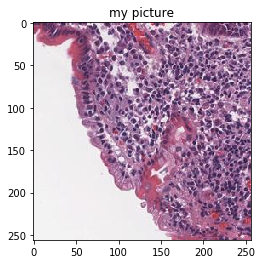

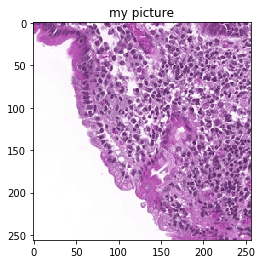

130365_6716_001_1375_3750_0 Saved! Count: 10000  
 /scratch/as3ek/data_segments/data_balanced_duplicate_sample/train/EE/130365_6716_001_1375_3750_0.jpg
10001 77_4648_6972_0
10002 84_4482_996_0
10003 130381_6723_001_426_142_0
10004 130373_6725_001_2900_1700_0
10005 23_6308_8466_0
10006 50_4750_7250_0
10007 130378_6730_001_2656_5976_0
10008 87_2656_830_0
10009 130378_6730_001_2500_6500_0
10010 130369_6721_001_6625_15125_0
10011 85_6806_4482_0
10012 130369_6721_001_1494_16932_0
10013 73_6640_1494_0
10014 130379_6731_002_2900_4900_0
10015 130373_6725_002_3154_2822_0
10016 51_4400_0_0
10017 59_3154_830_0
10018 29_1332_3996_0
10019 111_6640_5146_0
10020 77_6806_2158_0
10021 130379_6731_001_1625_4375_0
10022 130378_6730_002_1988_3692_0
10023 59_5750_1250_0
10024 130369_6721_001_6106_11644_0
10025 130380_6726_001_900_1300_0
10026 130369_6721_001_1400_2200_0
10027 79_3400_6200_0
10028 130373_6725_001_3125_3000_0
10029 130365_6716_001_2331_888_0
10030 58_2200_1800_0
10031 130376_6728_001_6105_66

10286 130369_6721_001_8798_11786_0
10287 130369_6721_001_8236_8946_0
10288 79_5810_3320_0
10289 130369_6721_001_8250_10875_0
10290 130369_6721_001_5500_11100_0
10291 23_498_8964_0
10292 50_3500_3250_0
10293 130369_6721_001_9657_10101_0
10294 130378_6730_002_1992_7304_0
10295 87_4150_1826_0
10296 130373_6725_002_2200_3300_0
10297 77_3320_4980_0
10298 42_1332_2664_0
10299 120_10126_3652_0
10300 130370_6722_001_11700_4200_0
10301 130377_6729_001_3408_4402_0
10302 59_8200_2600_0
10303 29_3330_3663_0
10304 130370_6722_001_1554_10212_0
10305 130370_6722_001_11875_3125_0
10306 130370_6722_001_12765_3330_0
10307 130365_6716_001_1328_3486_0
10308 120_4400_9000_0
10309 130370_6722_001_8800_2800_0
10310 111_500_7500_0
10311 130377_6729_001_1221_5217_0
10312 85_1800_5400_0
10313 77_3984_5976_0
10314 130372_6724_001_3441_9657_0
10315 73_5000_3000_0
10316 130370_6722_001_5439_12432_0
10317 108_4814_4648_0
10318 130372_6724_001_5900_2800_0
10319 130369_6721_001_1300_2800_0
10320 130369_6721_001_8500_

In [ ]:
count = 0
for key in images_by_folder.keys():
    images = list(images_by_folder[key])
    images.reverse()
    for value in images:
        count += 1
#         if count < 101370:
#             continue
#         print(key)
#         print(value)
        print (str(count) + ' ' + str(value))
        source_img_path = str(key) + str(value) + '.jpg'
        dest_img_path = str(path_change_map[key]) + str(value) + '.jpg'
#         print(source_img_path)
        img = staintools.read_image(source_img_path)
        if (np.mean(img) > 240) or (np.mean(img) < 10):
            continue
        # standardize brightness
        img_standard = standardizer.transform(img)
        # transform the images
        img_normalized = stain_normalizer.transform(img_standard)
        # write image to path

#             plt.imshow(img)
#             plt.title('my picture')
#             plt.show()
#             plt.imshow(img_normalized)
#             plt.title('my picture')
#             plt.show()

        if (count % 10000 == 0):
            plt.imshow(img)
            plt.title('my picture')
            plt.show()
            plt.imshow(img_normalized)
            plt.title('my picture')
            plt.show()
            print(value + ' Saved! Count: ' + str(count) + '  \n ' + str(dest_img_path))
        cv2.imwrite(os.path.normpath(dest_img_path), img_normalized)

In [9]:
images_by_folder['../data_segments/data_balanced_duplicate_sample/train/EE/'].reverse()

['111_4482_3486_0',
 '77_5500_8500_0',
 '130370_6722_001_5822_12212_0',
 '11_1998_999_0',
 '50_1332_5328_0',
 '85_1998_3663_0',
 '130369_6721_001_7600_10300_0',
 '50_6400_2000_0',
 '130370_6722_001_12700_3900_0',
 '130378_6730_001_1136_1988_0',
 '130382_6718_001_1625_625_0',
 '120_11952_2656_0',
 '120_1332_6993_0',
 '130379_6731_002_1700_4900_0',
 '130369_6721_001_900_19100_0',
 '130377_6729_001_5000_3125_0',
 '130379_6731_001_0_6816_0',
 '35_2500_3250_0',
 '73_3154_7304_0',
 '130379_6731_001_2664_2664_0',
 '58_6640_2822_0',
 '73_3486_7636_0',
 '130370_6722_001_12638_3550_0',
 '130378_6730_001_666_4995_0',
 '130380_6726_001_3976_1562_0',
 '35_7138_3320_0',
 '130373_6725_002_3625_2625_0',
 '23_5146_4648_0',
 '130379_6731_002_6250_625_0',
 '130379_6731_002_5200_2300_0',
 '11_3250_1750_0',
 '73_5800_7400_0',
 '29_332_2324_0',
 '130379_6731_001_3100_5700_0',
 '111_3800_8600_0',
 '130370_6722_001_8400_12800_0',
 '130370_6722_001_6600_12700_0',
 '50_2490_8964_0',
 '130370_6722_001_9300_12500

In [ ]:
list(images_by_folder.keys())[0]

In [ ]:
images_by_folder[list(images_by_folder.keys())[0]][3637]

In [ ]:
value = list(images_by_folder[list(images_by_folder.keys())[0]])[3637]

In [ ]:
len(list(images_by_folder[list(images_by_folder.keys())[0]])[3637:])

In [ ]:
source_img_path = str(key) + str(value) + '.jpg'

In [ ]:
source_img_path

In [ ]:
img = staintools.read_image(source_img_path)

In [ ]:
np.mean(img)

In [ ]:
plt.imshow(img)